In [5]:
import radiant as rad
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'

# Problem Parameters
a = 0.
b = 1.


def exact(*x):
    return np.prod(np.cos(np.asarray(x) * 2 * np.pi / (b - a)), axis=0)


def f(*x):
    return (len(x) * (2 * np.pi / (b - a)) ** 2 + 1) * exact(*x)

In [6]:
# Parameters
d = 2
k = 2
deltas = np.arange(0.2, 2.1, 0.1)
N = 10

# Computed Parameters
ranges = ((a, b),) * d
xc = rad.gridn(ranges, N, flat=True)

# Integration
integrator = rad.integrate.MeanIntegrator(ranges, 250)
error_integrator = rad.integrate.QuadIntegrator(ranges)

# Data collection
results = np.zeros((np.size(deltas), 3))

for i, delta in enumerate(deltas):
    # Solve for approximate solution
    phi = rad.Wendland(d, k, delta, xc)
    solver = rad.solve.GalerkinSolver(phi, integrator, 'helmholtz')
    approx = solver.solve(f)
    error = rad.error(exact, approx, error_integrator)
    cond = solver.cond()
    bw = np.max(solver.bandwidth())
    
    results[i, 0] = error
    results[i, 1] = cond
    results[i, 2] = bw
    
    print("Delta:", delta)
    print("  L2 Error:", error)
    print("  Condition Number:", cond)
    print("  Bandwidth:", bw)

Delta: 0.2
  L2 Error: 0.07965436339906068
  Condition Number: 57.05282686910563
  Bandwidth: 31
Delta: 0.30000000000000004
  L2 Error: 0.052796258856342315
  Condition Number: 766.2646810886374
  Bandwidth: 52
Delta: 0.4000000000000001
  L2 Error: 0.016786897157893867
  Condition Number: 1213.2758366036048
  Bandwidth: 71
Delta: 0.5000000000000001
  L2 Error: 0.017053985487117024
  Condition Number: 16176.505507920529
  Bandwidth: 84
Delta: 0.6000000000000001
  L2 Error: 0.017470347963701536
  Condition Number: 117277.28510828155
  Bandwidth: 95
Delta: 0.7000000000000002
  L2 Error: 0.01757818918266679
  Condition Number: 745433.9393755911
  Bandwidth: 98
Delta: 0.8000000000000003
  L2 Error: 0.017581957015985954
  Condition Number: 3176997.070595379
  Bandwidth: 99
Delta: 0.9000000000000001
  L2 Error: 0.017564875189891076
  Condition Number: 11701030.586792199
  Bandwidth: 99
Delta: 1.0000000000000002
  L2 Error: 0.017543253688529964
  Condition Number: 36143438.03373917
  Bandwidth

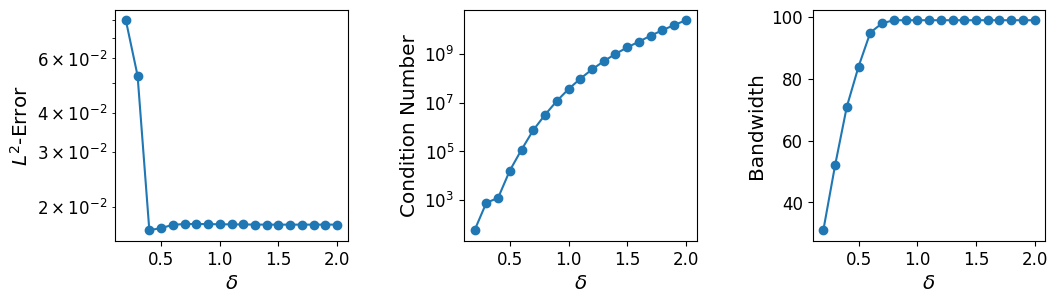

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(12,3))

axs[0].set_xlabel(r"$\delta$")
axs[0].set_ylabel(r"$L^{2}$-Error")
axs[0].set_yscale('log')
axs[0].plot(deltas, results[:, 0], 'o-')

axs[1].set_xlabel(r"$\delta$")
axs[1].set_ylabel(r"Condition Number")
axs[1].set_yscale('log')
axs[1].plot(deltas, results[:, 1], 'o-')

axs[2].set_xlabel(r"$\delta$")
axs[2].set_ylabel(r"Bandwidth")
axs[2].plot(deltas, results[:, 2], 'o-')

plt.subplots_adjust(wspace=0.5)
plt.savefig("figures/galerkin/deltas.pdf", bbox_inches='tight')